1. Написать программу, которая загружает изображение, с помощью мыши выполняет какие-то команды (функция по обработке мыши и клавиатуры) на свой вкус, потом изображение сохранить в файл. По типу того, что в первом ноутбуке.
2. Написать программу, которая считывает изображения из видеофайла. Для изображения сделать какие-нибудь эффекты, например, искажение цветов, добавить полосы, шум, круги и тд. Опять же, опираясь на то, что в последнем ноутбуке.

In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## 1. ##

In [186]:
image = cv2.imread('lena512color.tiff' )#[:,:,::-1] # сразу BRG -> RGB

In [187]:
cv2.imshow('win', image)
cv2.waitKey(0)
cv2.destroyWindow("win")

In [188]:
def draw(event, x:float, y:float, parameters, par_img: np.ndarray) -> None:
    if (event == cv2.EVENT_MBUTTONDOWN):
        # вставить надпись 'Hello, World!'
        cv2.putText(par_img, 'Hello, World!', (x,y), fontFace = cv2.FONT_ITALIC, fontScale = 0.5, color = (255, 255, 255))
        cv2.imshow('win', image)
        print ('Hello, world!')
    elif (event == cv2.EVENT_LBUTTONDOWN):
        # рисовать круги
        cv2.circle(par_img, (x,y), radius = 3, color = (0, 0, 0))
        cv2.imshow('win', image)
        print ('circle')
    elif (event == cv2.EVENT_RBUTTONDOWN):
        # рисовать точки
        cv2.rectangle(par_img, (x,y),(x+1,y+1),(0,0,0),-1)
        cv2.imshow('win', image)
        print ('point')
    elif ((event == cv2.EVENT_MOUSEMOVE) and (parameters & cv2.EVENT_FLAG_CTRLKEY)):
        # рисовать линии
        cv2.rectangle(par_img, (x,y),(x+1,y+1),(0,0,0),-1)
        cv2.imshow('win', image)

In [189]:
cv2.imshow( "win", image )
cv2.setMouseCallback("win", draw, image)
print(cv2.waitKey(0))
cv2.destroyWindow("win")

circle
circle
circle
circle
circle
point
point
point
point
point
point
point
point
-1


## 2. ##

In [207]:
def take_image(path: str, frame: int, show_frames: bool = True) -> np.ndarray:
    """Берет на вход путь к видео-файлу, а также кадр, который нужно извлечь. Возвращает кадр."""
    cap = cv2.VideoCapture(path)
    assert (cap.isOpened() != False), 'Ошибка открытия'
    totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    assert (frame > 0 and frame < totalFrames and type(frame) is int), 'Неправильный формат frame'
    if (show_frames == True):
        print (totalFrames)
    
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame)
    image = cap.read()[1][:,:,::-1] # в RGB сразу, ибо читать буду с plt
    return image

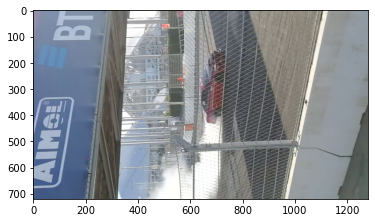

In [208]:
path = "1_video.mp4"
image = take_image(path, 587, False)
plt.imshow(image)
# Все работает, но так как видео снято с телефона и имеет вертикальный формат, то надо повернуть

**Надо повернуть**

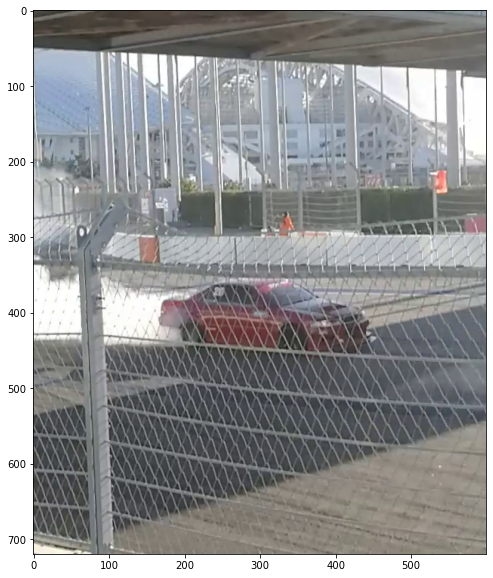

In [230]:
(h, w, d) = image.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 270, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.figure(figsize = (10,10))
rotated = rotated[:, 400:1000, :]
plt.imshow(rotated)

Теперь можно поиздеваться над этим фото

In [219]:
rotated.shape

(720, 600, 3)

**Горизонтальные полосы**

In [231]:
for i in range(0, len(rotated), 10):
    rotated[i] = 255

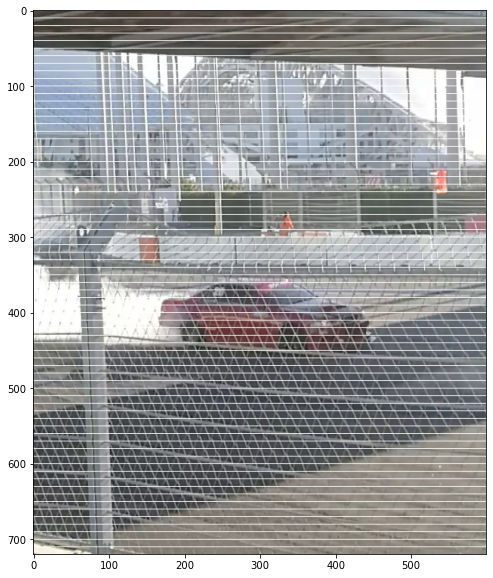

In [232]:
plt.figure(figsize = (10,10))
plt.imshow(rotated)

**Вертикальные полосы**

In [239]:
for i in range(0, len(rotated[0,:]), 10):
    rotated[:,i] = 255

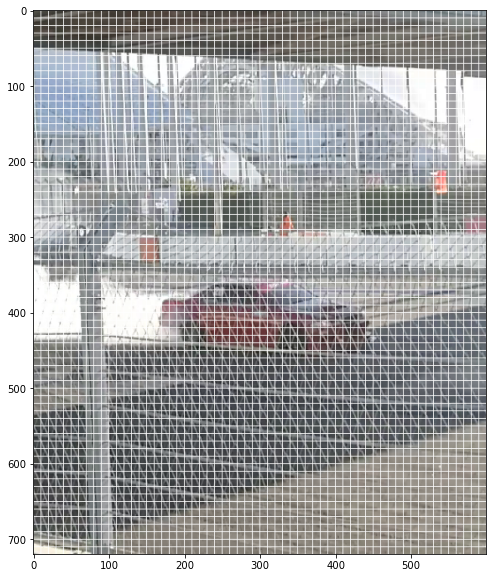

In [240]:
plt.figure(figsize = (10,10))
plt.imshow(rotated)

**Искажение цветов**

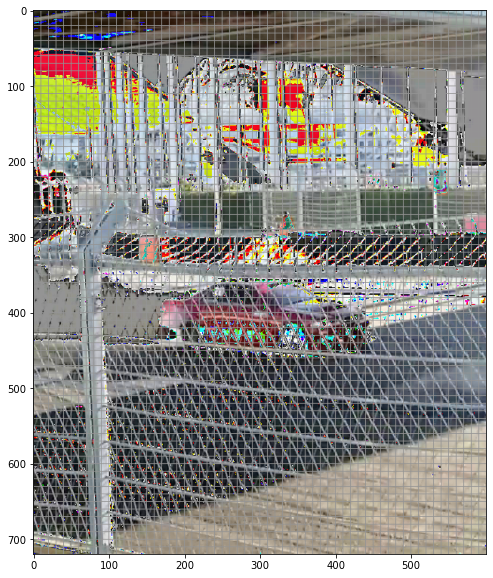

In [243]:
changed_colours = (rotated + 75)*2
plt.figure(figsize = (10,10))
plt.imshow(changed_colours) # цвета немного сломались)

**Добавление шума**

In [253]:
changed_colours_noise = changed_colours.copy()

In [258]:
x = np.random.random_integers(256, size=512)-1
y = np.random.random_integers(256, size=512)-1
z = np.random.random_integers(256, size=512)-1

for i in range(len(x)//3):
    changed_colours_noise[ x[i], y[i] ] = [0, 0, 255]
    changed_colours_noise[ x[512-i-1], y[512-i-1] ] = [0, 255, 0]
    changed_colours_noise[ x[512-i-2], y[512-i-2] ] = [255, 0, 0]

C:\Users\jeka_\AppData\Local\Temp/ipykernel_8280/1545066160.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 256 + 1) instead
  x = np.random.random_integers(256, size=512)-1
C:\Users\jeka_\AppData\Local\Temp/ipykernel_8280/1545066160.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 256 + 1) instead
  y = np.random.random_integers(256, size=512)-1
C:\Users\jeka_\AppData\Local\Temp/ipykernel_8280/1545066160.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 256 + 1) instead
  z = np.random.random_integers(256, size=512)-1


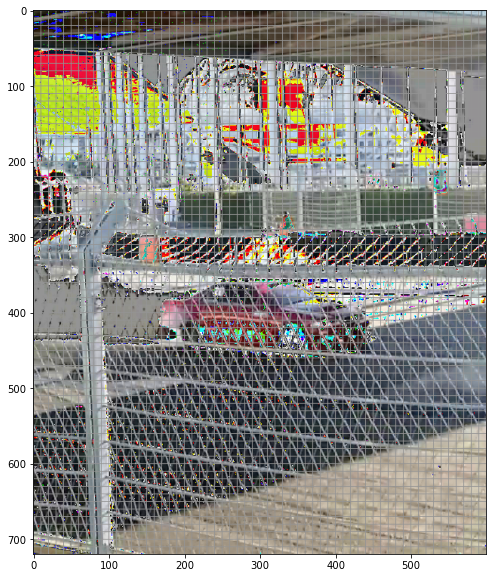

In [260]:
plt.figure(figsize = (10,10))
plt.imshow(changed_colours_noise)
# точки появились, просто они очень маленькие

## Бонус - это все теперь можно попытаться восстановить ##

In [346]:
restore = cv2.boxFilter(changed_colours_noise, 16, (3,3))

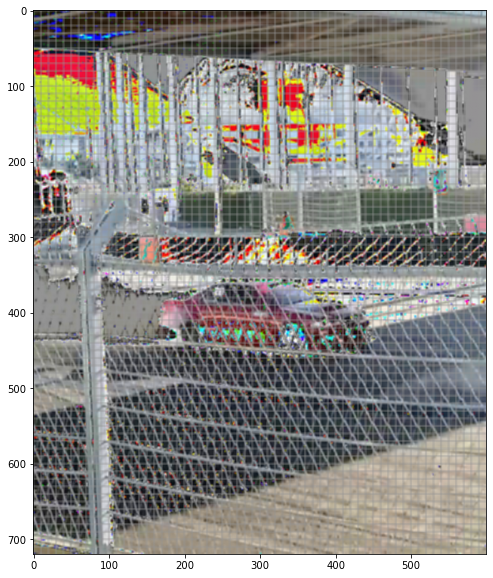

In [359]:
plt.figure(figsize = (10,10))
plt.imshow(restore/255)

In [ ]:
restore

In [286]:
image_fft = np.fft.fft(changed_colours_noise)

In [287]:
image_fft = np.abs(image_fft)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


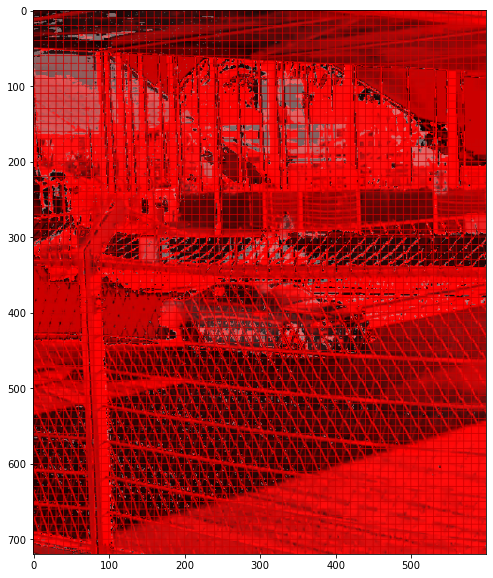

In [376]:
plt.figure(figsize = (10,10))
plt.imshow(image_fft)

In [372]:
restored_image = np.fft.ifft(image_fft)

In [373]:
restored_image = np.abs(restored_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


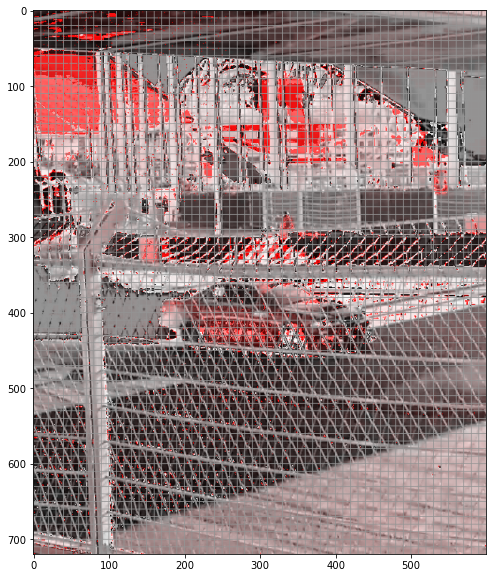

In [374]:
plt.figure(figsize = (10,10))
plt.imshow(restored_image/255) # ну, получилось не очень)